In [1]:
import os

os.chdir('../')

## Imports

In [2]:
import rasterio
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

## Handlers

In [3]:
def load_tif(file_path, verbose=1):
    # Load raster data
    with rasterio.open(file_path) as src:
        
        if verbose>0:
            print(f"Plik: {file_path}")
            print("Liczba kanałów:", src.count)
            print("Rozmiar (szer, wys):", src.width, src.height)
            print("Rozdzielczość:", src.res)
            print("CRS (układ współrzędnych):", src.crs)
            
            print("Opisy kanałów:", src.descriptions)
            print("Podsumowanie pliku:", src.profile)
        
        data = src.read()
        
        return data

In [4]:
data_path = Path('./data')
main_tif_path = data_path.joinpath("TerenyInwestycyjneKonin_transparent_mosaic_group1.tif")
dtm_tif_path = data_path.joinpath("TerenyInwestycyjneKonin_dtm.tif")
dsm_tif_path = data_path.joinpath("TerenyInwestycyjneKonin_dsm.tif")

main_tif = load_tif(main_tif_path)
dtm_tif = load_tif(dtm_tif_path)
dsm_tif = load_tif(dsm_tif_path)

# adjust background flag
dsm_tif[dsm_tif==-10000] = 115
dtm_tif[dtm_tif==-10000] = 115

Plik: data\TerenyInwestycyjneKonin_transparent_mosaic_group1.tif
Liczba kanałów: 4
Rozmiar (szer, wys): 4713 5015
Rozdzielczość: (0.442079715680034, 0.4420749152542373)
CRS (układ współrzędnych): EPSG:2177
Opisy kanałów: (None, None, None, None)
Podsumowanie pliku: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4713, 'height': 5015, 'count': 4, 'crs': CRS.from_wkt('PROJCS["ETRF2000-PL / CS2000/18",GEOGCS["ETRF2000-PL",DATUM["ETRF2000_Poland",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1305"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","9702"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",18],PARAMETER["scale_factor",0.999923],PARAMETER["false_easting",6500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","2177"]]'

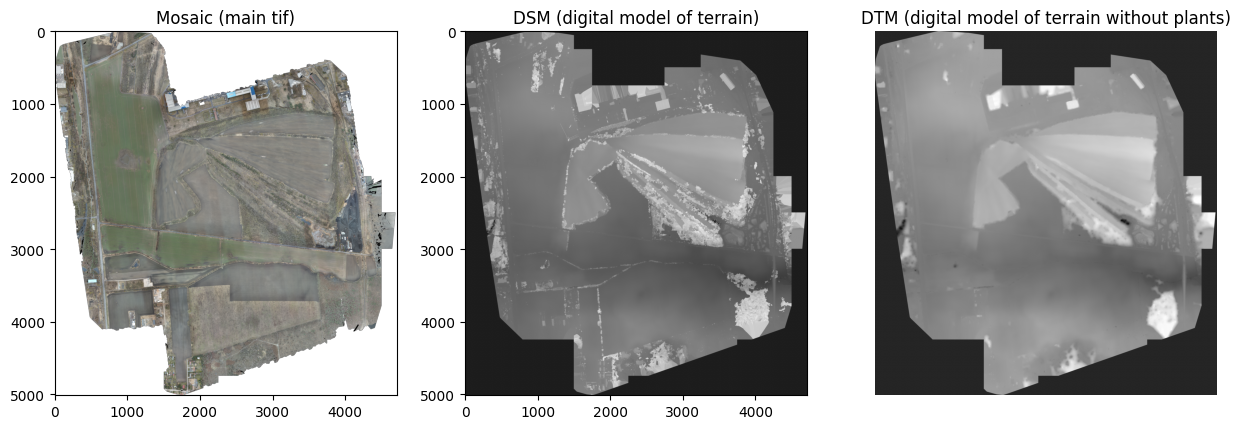

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))

axs[0].imshow(main_tif.swapaxes(0,1).swapaxes(1,2))
axs[1].imshow(dsm_tif.swapaxes(0,1).swapaxes(1,2),#.astype(np.uint8), 
              cmap='grey')
axs[2].imshow(dtm_tif.swapaxes(0,1).swapaxes(1,2),#.astype(np.uint8), 
              cmap='grey')


axs[0].set_title("Mosaic (main tif)")
axs[1].set_title("DSM (digital model of terrain)")
axs[2].set_title("DTM (digital model of terrain without plants)")

plt.axis("off")
plt.show()

### Backup: zoom

In [20]:
# Wyświetl obraz
def show_band(band):
    plt.figure(figsize=(10, 10))
    plt.imshow(band, cmap='gray')
    plt.title("P                                                                                                                                                                                                                                                                                                                                                                                                   ")
    if len(band.shape)==2:
        plt.colorbar(label='Intensywność')
    plt.axis('off')
    plt.show()

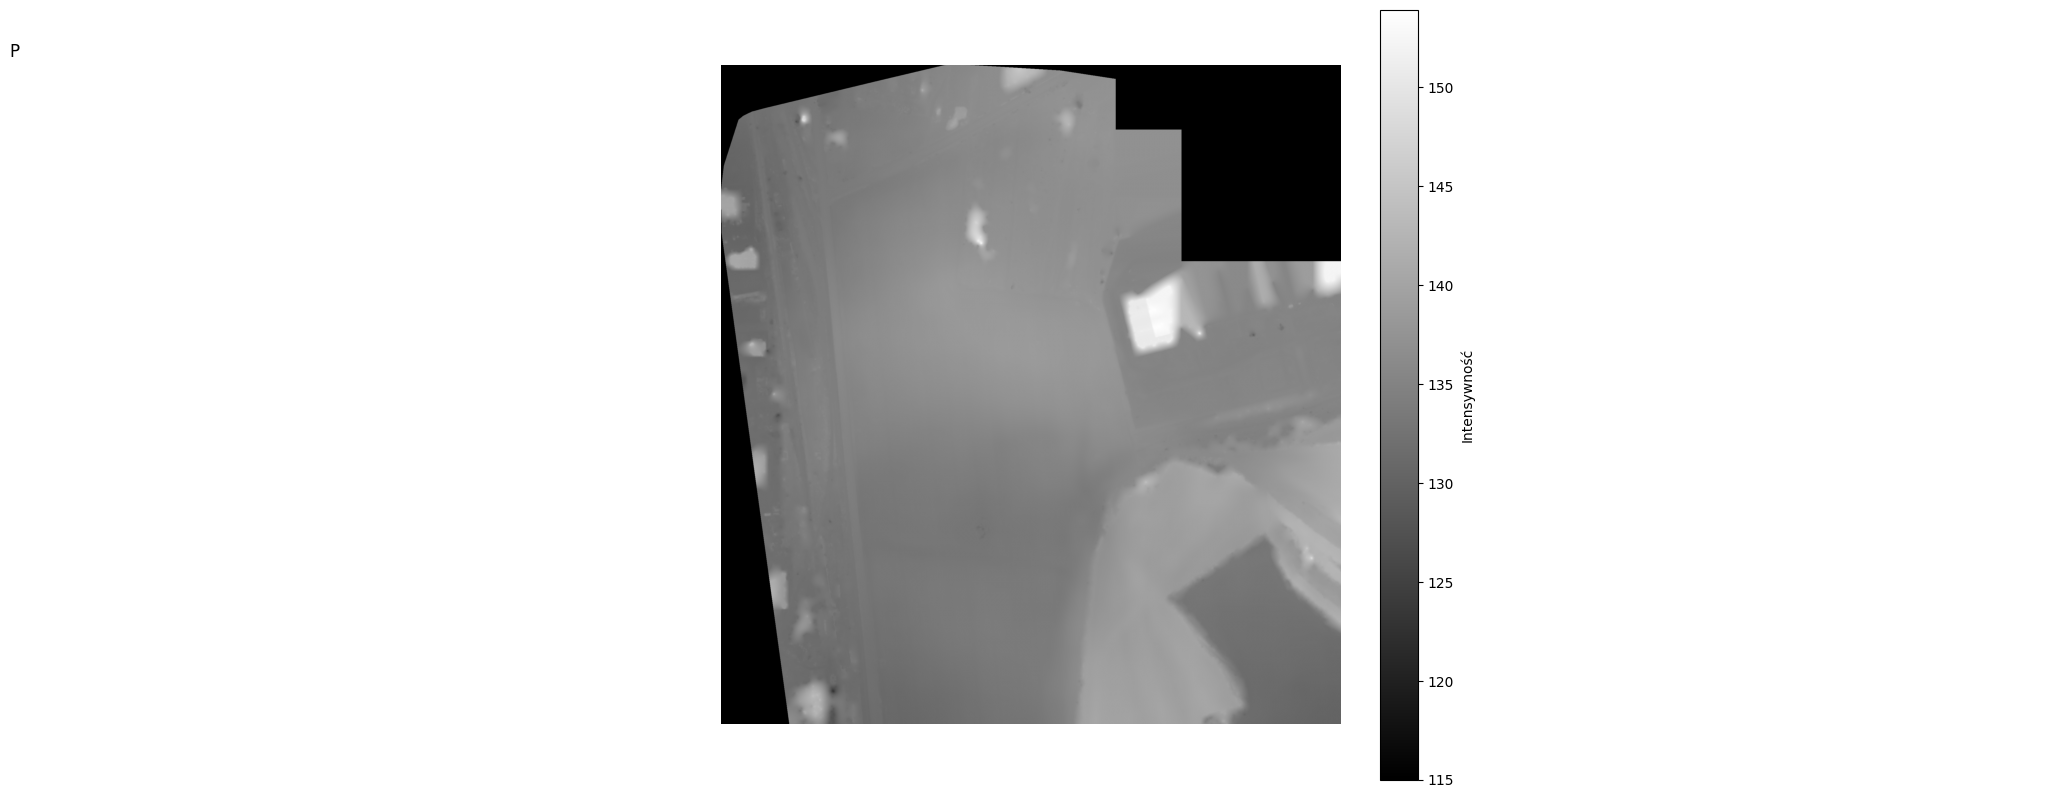

In [21]:
show_band(dtm_tif[0, :dtm_tif.shape[1]//2, :dtm_tif.shape[2]//2])